In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import jax.numpy as jnp
import jax.random as jrandom
from matplotlib import pyplot as plt
import matplotlib.collections as mcoll
from time import time
import fmath


%matplotlib widget
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams.update({'font.size': 14})
CMAP = plt.get_cmap('copper')

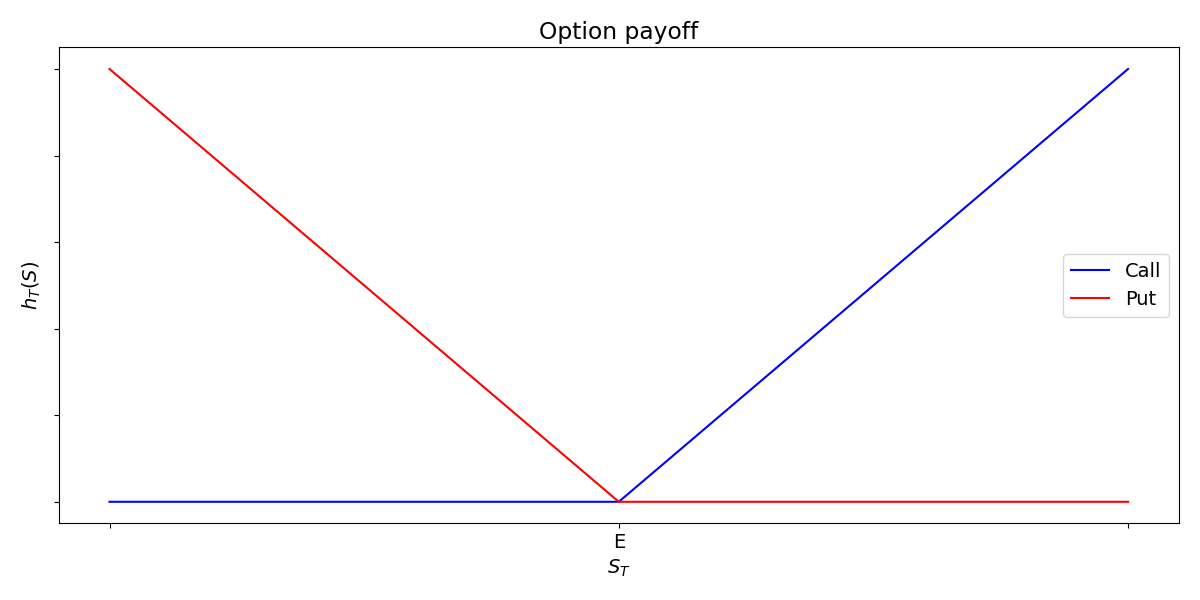

In [4]:
plt.figure('Option payoff')
plt.clf()

S = np.arange(1, 4, 1)
E = 2

ht = np.maximum(S-E, np.zeros(len(S)))
plt.plot(S, ht, color='blue', label='Call')

ht = np.maximum(E-S, np.zeros(len(S)))
plt.plot(S, ht, color='red', label='Put')

plt.gca().get_yaxis().set_ticklabels([])
plt.gca().get_xaxis().set_ticks(S)
plt.gca().get_xaxis().set_ticklabels([' ', 'E', ' '])
plt.legend()
plt.ylabel('$h_T(S)$')
plt.xlabel('$S_T$')
plt.title(f'Option payoff')
plt.tight_layout()
plt.show()

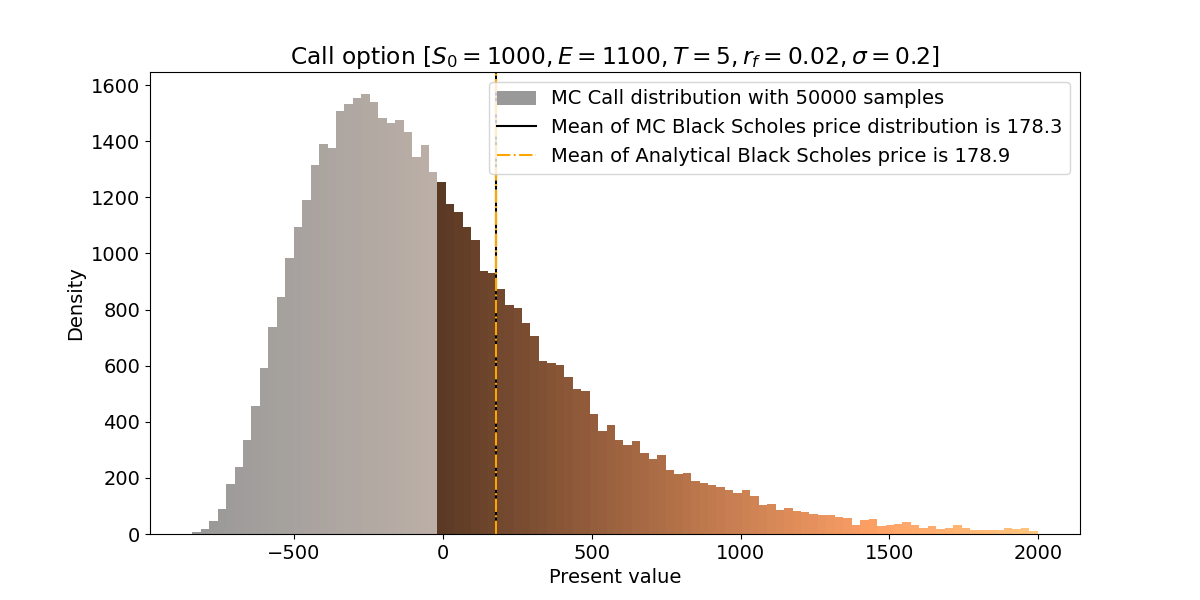

In [3]:
S0      = 1000
E       = 1100
T       = 5
r       = 0.02
sigma   = 0.2
N       = 50000

mean, dist = fmath.mc_call_option_price(S0, E, T, r, sigma, samples=N)
dist = dist[dist < 2*S0]
price = fmath.bs_call_option_price(S0, E, T, r, sigma, samples=N)
analytical_mean = price

plt.figure('Call Option pricing')
plt.clf()
# Histogram
n, bins, patches = plt.hist(dist, bins=100, alpha=1, label=f'MC Call distribution with {N} samples')
z = np.linspace(0.0, 1.0, len(bins))
for p, c in zip(patches, z):
    plt.setp(p, 'facecolor', CMAP(c))
for i in range(0, len(bins[bins<=0]) -1):
    patches[i].set_alpha(0.4)
# Mean lines
plt.axvline(x=mean, c='black', ls='-', label=f'Mean of MC Black Scholes price distribution is {mean:.1f}')
plt.axvline(x=analytical_mean, c='orange', ls='-.', label=f'Mean of Analytical Black Scholes price is {analytical_mean:.1f}')

plt.legend()
plt.ylabel('Density')
plt.xlabel('Present value')
plt.title(f'Call option [$S_0={S0}, E={E}, T={T}, r_f={r}, \sigma={sigma}$]')
plt.show()


In [4]:
def get_line_collection(x:np.array, y:np.array, cmap:plt.colormaps=plt.get_cmap('copper'), alpha_min=0.02):

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    z = np.linspace(0.0, 1.0, len(x))
    alphas = np.linspace(alpha_min, 1, len(x))
    lc = mcoll.LineCollection(segments, array=z, cmap=cmap, linewidths=(0.8), norm=plt.Normalize(0.0, 1.0), alpha=alphas)

    return lc

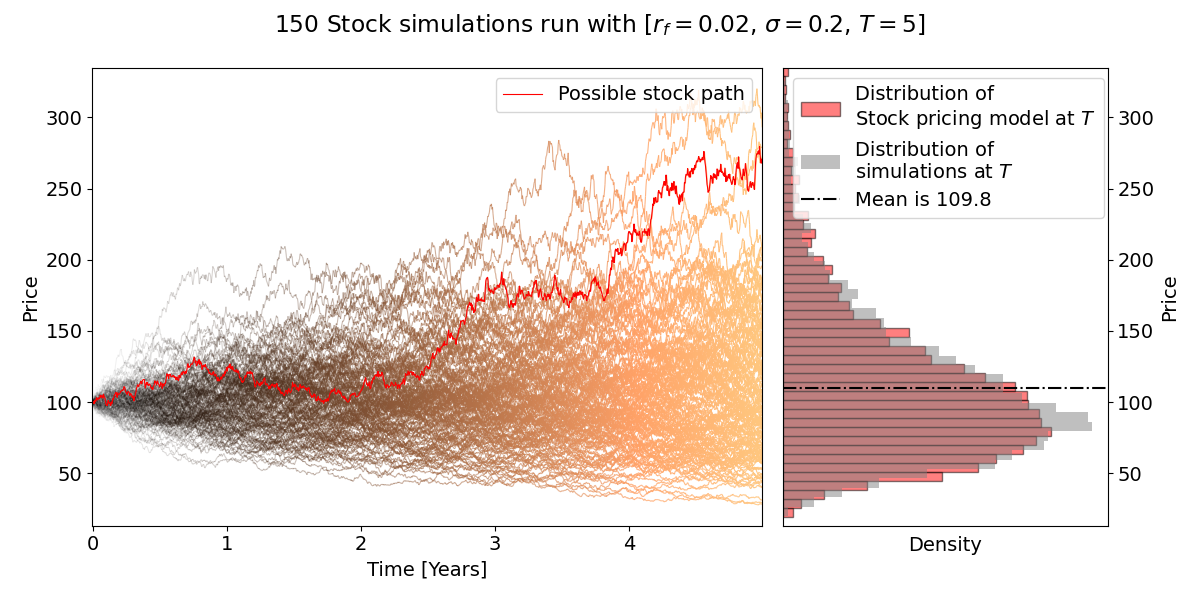

In [5]:
S0      = 100
T       = 5
r       = 0.02
sigma   = 0.2

plt.figure('Stock price process')
plt.clf()

# Stock simulations
left = plt.subplot2grid((1, 3), (0, 0), rowspan=1, colspan=2)
S = fmath.mc_stock_price(S0, T, r, sigma, 150)
for i in range(len(S[0])):
    x = np.linspace(0, len(S), len(S))
    lc = get_line_collection(x, S[:,i])
    plt.gca().add_collection(lc)
left.plot(S[:, 0], c='r', lw=0.8, label='Possible stock path')
ticks = np.arange(1, len(S[:,0]), 255)
plt.xticks(ticks, np.arange(0, T, 1))
plt.margins(x=0)
plt.ylabel('Price')
plt.xlabel('Time [Years]')
plt.legend()

# Stock model prices
right = plt.subplot2grid((1, 3), (0, 2), rowspan=1, colspan=1)
S = fmath.mc_stock_price(S0, T, r, sigma, 5000)
s = fmath.model_stock_price(S0, T, r, sigma, 5000)
right.hist(s[:,0], bins=70, color='r', alpha=0.5, ec='black', orientation="horizontal", label='Distribution of\nStock pricing model at $T$')
right.hist(S[-1,:], bins=70, color='grey', alpha=0.5, orientation="horizontal", label='Distribution of\nsimulations at $T$')
mean = np.mean(S[-1,:])
plt.axhline(y=mean, c='black', ls='-.', label=f'Mean is {mean:.1f}')

plt.setp(plt.gca(), ylim=left.get_ylim())
plt.ylabel('Price')
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.gca().set_xticks([])
plt.xlabel('Density')
plt.legend()

plt.subplots_adjust(wspace=0)
plt.gcf().suptitle(f'150 Stock simulations run with [$r_f={r}$, $\sigma={sigma}$, $T={T}$]')
plt.tight_layout()
plt.show()

In [8]:
S0      = 1000
E       = 1100
T       = 5
r       = 0.02
sigma   = 0.2
N       = 50000000

mean, dist = fmath.mc_call_option_price(S0, E, T, r, sigma, samples=N)

mean, dist = fmath.slow_mc_call_option_price(S0, E, T, r, sigma, samples=N)

price = fmath.bs_call_option_price(S0, E, T, r, sigma)



Function: mc_call_option_price
With args: [(1000, 1100, 5, 0.02, 0.2), {'samples': 50000000}]
Took 1.120s to run.

Function: slow_mc_call_option_price
With args: [(1000, 1100, 5, 0.02, 0.2), {'samples': 50000000}]
Took 3.960s to run.

Function: bs_call_option_price
With args: [(1000, 1100, 5, 0.02, 0.2), {}]
Took 0.002s to run.

